In [1]:
import numpy as np
import sys, os
sys.path.append('../../shared/utilsGRF/')
from IPython.display import display
import writescripts 

In [2]:
edges=[(1,'a1',2),(2,'a1r',1),(2,'a2',3),(3,'a3',1),
       (4,'alpha1',5),(5,'alpha1r',4),(5,'alpha2',6),(6,'alpha3',4),
      (1,'kb1-x',4),(4,'ku1',1),(2,'kb2-x',5),(5,'ku2',2),(3,'kb3-x',6),(6,'ku3',3)]

MTTfolder='../../shared/utilsGRF' #folder with MTT.py 
basename='graph'

parlist=[x[1] for x in edges]
parlist=list(set(parlist))


list(set(parlist))

for pnum,par in enumerate(parlist):
    if '-x' in par:
        parlist[pnum]=parlist[pnum].replace('-x','')
print(parlist)

obj=writescripts.PrepareFilesNoneq(edgelist=edges,varGRF='x',concvars=['x'],parlist=parlist,MTTfolder=MTTfolder,graphbasename=basename)
obj.write_execute_parse()

obj.simpify_rhos()

['alpha1', 'alpha1r', 'alpha2', 'kb2', 'a2', 'ku3', 'a3', 'kb3', 'alpha3', 'ku2', 'a1r', 'a1', 'ku1', 'kb1']
removing  ../../shared/utilsGRF/graph-parsed.txt
removing  ../../shared/utilsGRF/graph-6.txt
removing  ../../shared/utilsGRF/graph-5.txt
removing  ../../shared/utilsGRF/graph-4.txt
removing  ../../shared/utilsGRF/graph-1.txt
removing  ../../shared/utilsGRF/graph-3.txt
removing  ../../shared/utilsGRF/graph-2.txt
removing  ../../shared/utilsGRF/graph.txt
executing MTT
0


In [3]:
import sympy
from sympy.parsing.sympy_parser import parse_expr

In [4]:
sympy.init_printing()

In [5]:
for label in parlist:
    #print(label)
    exec("%s=sympy.symbols('%s')"%(label,label))
for var in ['x']:
    exec("%s=sympy.symbols('%s')"%(var,var))
epsilon1,epsilon2,epsilon3,epsilon1r,kb,ku,c1,c2=sympy.symbols('epsilon_1,epsilon_2,epsilon_3,epsilon1r,k_b,k_u,c1,c2')
all_rhos_sympy=[]
for rho in obj.all_rhos:
    expr=parse_expr(rho.split("=")[1])
    expr_simple=expr.subs({alpha1:epsilon1*a1,alpha1r:epsilon1r*a1r,alpha2:epsilon2*a2,alpha3:epsilon3*a3,kb1:kb,kb2:kb,kb3:kb,ku1:ku,ku2:ku,ku3:ku})
    all_rhos_sympy.append(expr_simple)

In [6]:
for i in range(6):
    print("Trees for node ",i+1)
    for tree in sympy.Add.make_args(all_rhos_sympy[i]):
        print(tree)
    print()

Trees for node  1
a1r*a3*k_u**3
a2*a3*k_u**3
a1r*a3**2*epsilon_3*k_u**2
a2*a3**2*epsilon_3*k_u**2
a1r**2*a3*epsilon1r*k_u**2
a2**2*a3*epsilon_2*k_u**2
a1*a1r*a3*epsilon_1*k_u**2
a1*a2*a3*epsilon_1*k_u**2
a1r*a2*a3*epsilon1r*k_u**2
a1r*a2*a3*epsilon_2*k_u**2
a1r**2*a3**2*epsilon1r*epsilon_3*k_u
a2**2*a3**2*epsilon_2*epsilon_3*k_u
a1*a1r*a3**2*epsilon_1*epsilon_3*k_u
a1*a2*a3**2*epsilon_1*epsilon_3*k_u
a1*a2**2*a3*epsilon_1*epsilon_2*k_u
a1r*a2*a3**2*epsilon1r*epsilon_3*k_u
a1r*a2*a3**2*epsilon_2*epsilon_3*k_u
a1r*a3*epsilon1r*k_b*k_u**2*x
a1r*a3*epsilon_3*k_b*k_u**2*x
a2*a3*epsilon_2*k_b*k_u**2*x
a2*a3*epsilon_3*k_b*k_u**2*x
a1*a1r*a2*a3*epsilon_1*epsilon_2*k_u
a1r*a3*epsilon1r*epsilon_3*k_b**2*k_u*x**2
a1r*a3**2*epsilon1r*epsilon_3*k_b*k_u*x
a2*a3*epsilon_2*epsilon_3*k_b**2*k_u*x**2
a2*a3**2*epsilon_2*epsilon_3*k_b*k_u*x
a1r**2*a3*epsilon1r*epsilon_3*k_b*k_u*x
a2**2*a3*epsilon_2*epsilon_3*k_b*k_u*x
a1*a1r*a3*epsilon_1*epsilon_3*k_b*k_u*x
a1*a2*a3*epsilon_1*epsilon_2*k_b*k_u*x
a1r*a2*a3

In [7]:
phi1=all_rhos_sympy[0]
phi2=all_rhos_sympy[1]
phi3=all_rhos_sympy[2]
phi4=all_rhos_sympy[3]
phi5=all_rhos_sympy[4]
phi6=all_rhos_sympy[5]

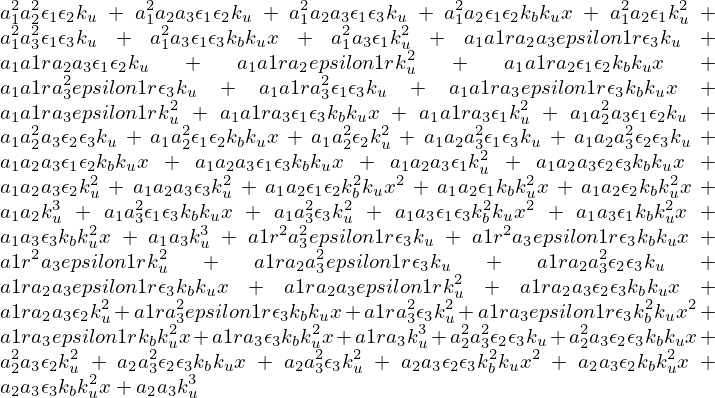

In [8]:
phi1+phi2+phi3

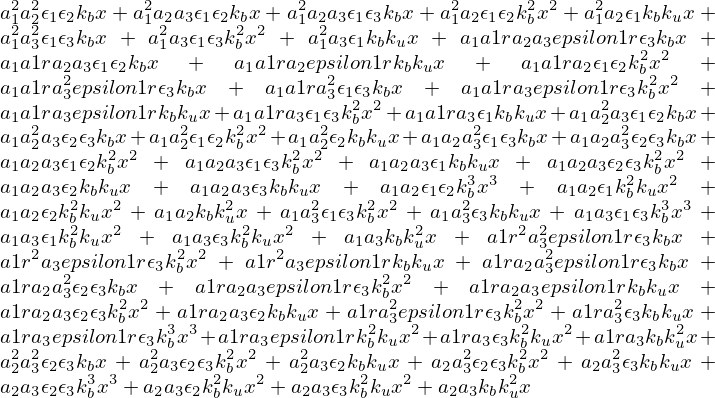

In [9]:
phi4+phi5+phi6

In [10]:
num=c1*a3*phi3+c2*a3*epsilon3*phi6
den=phi1+phi2+phi3+phi4+phi5+phi6

In [11]:
dnum=sympy.diff(num,x)
dden=sympy.diff(den,x)

In [12]:
#left=(sympy.diff(phi3,ku)+alpha3*sympy.diff(phi6,ku))*den
#right=(phi3+alpha3*phi6)*dden
left=dnum*den
right=num*dden

In [13]:
#B=sympy.symbols('B')

In [14]:
l_r=sympy.expand(left-right)
#l_rB=l_r.subs(kb*x,B)
poly_zero=sympy.Poly(l_r,x)


In [15]:
poly_zero.degree()

In [16]:
from sympy.printing import mathematica

In [17]:
math_output=open("tocheckwithm_nonmx_3steps_rev_c1c2.in","w")
all_terms=[]
for cn,coeff in enumerate(poly_zero.coeffs()[::-1]):
    termsc=[]
    print(cn)
    for monomial in sympy.Add.make_args(coeff):
        #print(monomial, sympy.Mul.make_args(monomial))
        noneps=[]
        eps=[]
        number=1
        eps_base=[] #bases, for ordering by letter
        noneps_base=[] #bases, for ordering by letter
        args= sympy.Mul.make_args(monomial) #separate each monomial into each variable (a,epsilon,number)
        for arg_ in args:
            if type(arg_)==sympy.power.Pow:
                arg=sympy.power.Pow.as_base_exp(arg_)[0] #get the base of the power so that I can check if it is epsilon or not
            else:
                arg=arg_
            if  arg in [epsilon1,epsilon2,epsilon3,epsilon1r,c1,c2]:
                eps.append(arg_)
                eps_base.append(arg.name)
            else:
                
                #print(type(arg))
                if type(arg)!=sympy.numbers.Integer and type(arg)!=sympy.numbers.NegativeOne:
                    noneps_base.append(arg.name)
                    noneps.append(arg_)
                else:
                    number=arg
                    
        #print(monomial)
        #print(number)
        noneps_o=np.array(noneps)[np.argsort(np.array(noneps_base))]
        eps_o=np.array(eps)[np.argsort(np.array(eps_base))]
        #print(number,noneps_o,eps_o)
        termsc.append([number,noneps_o,eps_o])
    all_terms.append(termsc)

for i in range(len(all_terms)):
    print("degree ",i)
    coeffi=all_terms[i]
    #print(coeffi)
    base=[] #list of common factors that do not contain epsilons
    #find the unique common factors without epsilons
    for j in range(len(coeffi)):
        b=coeffi[j][1]
        present=False
        for k in range(len(base)):
            if np.all(base[k]==b):
                present=True
        if not present:
            base.append(b)
    #find which term in the original coefficient expression correspond to each common factor
    common_bases_idx=[[] for i in range(len(base))] #which terms have those common factors
    for j in range(len(coeffi)):
        b=coeffi[j][1]
        for k in range(len(base)):
            if np.all(base[k]==b):
                common_bases_idx[k].append(j)
    #now for each base, print the epsilon terms side by side to check which sign wins 
    print(len(base))
    for k in range(len(base)):
        #print(base[k])
        idxs=common_bases_idx[k]
        epsilons_terms=0
        for idx in idxs:
            terms=coeffi[idx]
            #print(terms)
            number=terms[0]
            epsilons=terms[2]
            prod=1
            for e in epsilons:
                prod*=e

            #if np.abs(number)==1:
            epsilons_terms+=number*prod
            #else:
            #    if number<1:
            #        sign=-1
            #    else:
            #        sign=1
            #    for k in range(np.abs(number)):
            #        epsilons_terms+=sign*prod
        #display(epsilons_terms)
        #display(idx,sympy.factor(epsilons_terms),epsilons_terms)
        math_output.write(str(i)+";"+mathematica.mathematica_code(epsilons_terms).replace("_","")+"\n")
math_output.close()
        
#print(base)
#print(common_bases_idx)
    
        
#then identify together those with same noneps
#common together epsilons with the number (Integer)

0
1
2
3
4
degree  0


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


86
degree  1
66
degree  2
41
degree  3
16
degree  4
4


In [20]:
44+34+22+10+3